# Lab 8: Define and Solve an ML Problem of Your Choosing

In [95]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [96]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header = 0)

print(df.head())
print(df.shape)

                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
(1973, 2)


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have chose is the Book Review data set. 
2. I will be predicting whether a given review is positive or not - that will be my label
3. This is a supervised learning problem as our given data already includes both features and labels that our model will learn from and then make label predictions on unseen data. Additionally it is a binary classification problem as it only has two possible predictive outcomes. 
4. The data set has only one feature and that is the "Review" column.
5. This is an important problem because recieving customer feedback for any product or service is incredibly important for companies to improve. In this case, if a book has positive reviews, more people are likely to buy it, hence it'll generate greater profits for the company, and positive reviews are important for marketing. By developing an algorithm that is able to predict whether a review is positive or not, helps save significant time, as it would be impossible to sift through every review manually. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Inspect the shape and contents of the data. 

In [97]:
print(df.head())
print(df.shape)

                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
(1973, 2)


Preliminary inspection of the statistics of our data

In [98]:
print(df.describe())

                                                   Review Positive Review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993


We can see from the above cell that some of the reviews are not unique - there may be some repeated reviews within the dataset count. 

Check for missing values

In [99]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count


Review             0
Positive Review    0
dtype: int64

Keep only unique values for your feature column.

In [100]:
print(df.nunique())
df_unique_reviews = df.drop_duplicates(subset='Review')
df_unique_reviews.shape

Review             1865
Positive Review       2
dtype: int64


(1865, 2)

Address class imbalances

In [101]:
print(df_unique_reviews['Positive Review'].value_counts())


True     979
False    886
Name: Positive Review, dtype: int64


Create Labeled Examples from the Data Set

In [102]:
y = df_unique_reviews['Positive Review']
X = df_unique_reviews['Review']

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I will first attempt to preprocess our text data by converting all text to lowercase, removing special characters, removing stopwords from the text, tokenizing the text (split it into smaller chunks), and lemmatizing the text (converting a word to its root word). For this I will need to import the Gensim library. 
2. I will split my data into test and training sets so that I can train my model on the training set and then test its performance on the test set. 
3. In order to use my text data I will first need to covert it to numeric vectors. I will do this by using a Term Frequency Inverse Document Frequency (TF-IDF) vectorizer. 
4. In the previous part I prepared my data by:
   - Addressing missingness by checking for any missing feature or label values. The data set did not have any missing values so no further modifications were needed.
   - I removed all duplicate values and only kept the unique values of my data set  
   - I chose not to rename the label as the current name is more intuitive and self-explantory. 
5. I would like to develop a feedforward neural network with an input layer, three hidden layers, and an output layer:
   - Input layer: The input shape in this layer will be in line with the vocabulary size.
   - Hidden layers: With 64, 32, and 16 units (number of nodes) in each. Every layer will make use of the activation function of ReLU.
   - Output layer: There will be one unit in the output layer. The output layer will make use of the activation function sigmoid. We will use the sigmoid activation function to convert the result to a probability between 0.0 and 1.0 because we are working with binary classification. If the likelihood is higher, we can subsequently set a threshold and presume that the prediction is class 1.

6. I would then analyse the performance of my model using an BinaryCrossEntropy loss function (since we are dealing with a binary classification problem). To better visualise the loss and accuracy I would plot it using matplotlib.
   
7. To improve my model I would change up two things:
   - The number of hidden layers, or the number of nodes that I am using in my neural network.
   - I would adjust the different n-gram ranges of my vectorizer.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Create training and test datasets

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1234)

Transform the features into numerical vectors using TfidfVectorizer.

In [105]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Determine the dimensionality of the input layer

In [106]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

18463


Build neural network architecture. It will have three hidden layers, an output layer, and an input layer:

• Input layer: The input shape in this layer will be in line with the vocabulary size.

• Hidden layers: With 64, 32, and 16 units (number of nodes) in each. Every layer will make use of the activation function of ReLU.

• Output layer: There will be one unit in the output layer. The output layer will make use of the activation function sigmoid. We will use the sigmoid activation function to convert the result to a probability between 0.0 and 1.0 because we are working with binary classification. If the likelihood is higher, we can subsequently set a threshold and presume that the prediction is class 1.

In [107]:
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)


hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1181696   
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 1,184,321
Trainable params: 1,184,321
Non-trainable params: 0
_________________________________________________________________


Build an optimization function

In [108]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

Define the loss function

In [109]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)

Compile our model

In [110]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_function, metrics=['accuracy'])

In [111]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [112]:
t0 = time.time() # start time
num_epochs = 55 #epochs
history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],)
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 55], Loss: 0.6854, Accuracy: 0.5322, Val_loss: 0.6896, Val_accuracy: 0.5071
Epoch [10/ 55], Loss: 0.6337, Accuracy: 0.7165, Val_loss: 0.6636, Val_accuracy: 0.5429
Epoch [15/ 55], Loss: 0.5111, Accuracy: 0.7236, Val_loss: 0.5801, Val_accuracy: 0.6679
Epoch [20/ 55], Loss: 0.3203, Accuracy: 0.8658, Val_loss: 0.4840, Val_accuracy: 0.7500
Epoch [25/ 55], Loss: 0.3123, Accuracy: 0.8667, Val_loss: 0.4873, Val_accuracy: 0.7464
Epoch [30/ 55], Loss: 0.0305, Accuracy: 1.0000, Val_loss: 0.5642, Val_accuracy: 0.7571
Epoch [35/ 55], Loss: 0.0072, Accuracy: 1.0000, Val_loss: 0.6253, Val_accuracy: 0.7357
Epoch [40/ 55], Loss: 0.0035, Accuracy: 1.0000, Val_loss: 0.6704, Val_accuracy: 0.7321
Epoch [45/ 55], Loss: 0.0022, Accuracy: 1.0000, Val_loss: 0.7011, Val_accuracy: 0.7393
Epoch [50/ 55], Loss: 0.0016, Accuracy: 1.0000, Val_loss: 0.7297, Val_accuracy: 0.7357
Epoch [55/ 55], Loss: 0.0012, Accuracy: 1.0000, Val_loss: 0.7462, Val_accuracy: 0.7357
Elapsed time: 5.81s


In [113]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualise model performance

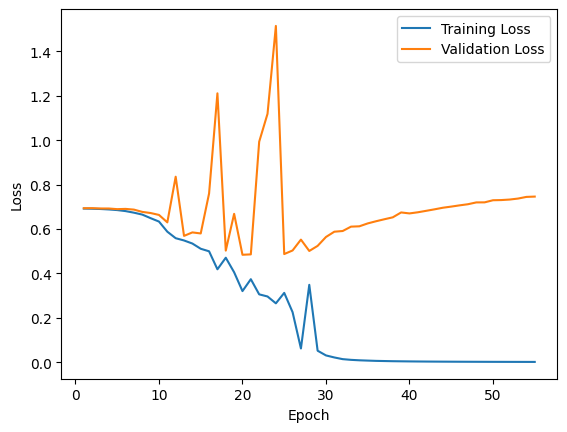

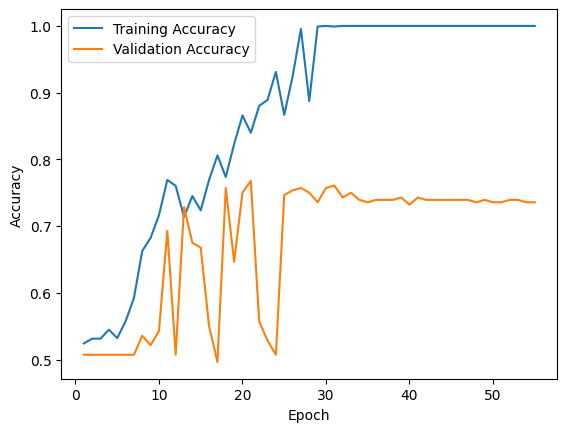

In [114]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')

plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')

plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'],label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Evaluate Test Set Performance

In [115]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

15/15 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.8201
Loss:  0.5698230266571045 Accuracy:  0.8201285004615784


In [116]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())
print("Predictions for the first 20 examples:")
for i in range(0,20):
    if probability_predictions[i] >= 0.5:
        print("probability: {0} Good Review?: {1}\n".format(probability_predictions[i], y_test.to_numpy()[i]))

Predictions for the first 20 examples:
probability: [0.942776] Good Review?: True

probability: [0.99963236] Good Review?: True

probability: [0.9969741] Good Review?: True

probability: [0.91187716] Good Review?: True

probability: [0.99973345] Good Review?: True

probability: [0.99925244] Good Review?: True

probability: [0.95550096] Good Review?: True

probability: [0.9989613] Good Review?: True

probability: [0.68531805] Good Review?: True

probability: [0.99900055] Good Review?: True

probability: [0.66570544] Good Review?: False



Analysis of my results;
1. I changed the learning rate twice, quite significantly. First I made it 0.01, that nearly halfed my accuracy. Similarly when I increased the learning rate to 0.5 it also reduced my accuracy by about the same amount.
2. I changed the n-gram range to gram_range=(1,2) as opposed to the default (1,1) - this also had a slight impact on my model's accuracy - reducing it by 0.02. Changing the range also significantly increased model run time. If we had more expansive data, this may have proven to be an exectuation bottleneck failure. 
3. I was not able to properly import the Gensim library and pre-process my text data as I had intended. I believe the preprocessing step would have made the data even more suitable to be used in my model, and would have improved model performance. 